## Problem

https://gym.openai.com/envs/FrozenLake-v0/

FrozenLake-v0
The agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile.

Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend.

The surface is described using a grid like the following:

The episode ends when you reach the goal or fall in a hole. You receive a reward of 1 if you reach the goal, and zero otherwise.

## Importing libraries

In [ ]:
import numpy as np
import gym, time
import random
from IPython.display import clear_output

## Details for the file that is to be loaded can also be checked by directlly accessing the file present insite site package
# /home/mohit/Documents/MyProject/MyProjectVirEnv/lib/python3.6/site-packages/gym/envs/toy_text

## Selecting and understanding the environment

The **Discrete space** allows a fixed range of non-negative numbers, so in this case valid actions are either 0 or 1.  
The **Box space** represents an n-dimensional box, so valid observations will be an array of 4 numbers. We can also check the Box’s bounds:

In [ ]:
## Box - Box

## Box - Discrete

## Discrete - Box

## Discrete - Discrete
env = gym.make("FrozenLake-v0") # ActionState: Discrete(4,), ObservationSpace: Discrete(16)

gym.envs.registration.register(
    id= 'FrozenLake_CustomNotSlippery-v0', 
    entry_point= 'gym.envs.toy_text:FrozenLakeEnv',
    
    ## MyProjectVirEnv/lib/python3.6/site-packages/gym/envs/toy_text/
    
    kwargs={'map_name' : '8x8', 'is_slippery': False}
#     max_episode_steps=100,
#     reward_threshold=0.78, # optimum = .8196
)

print(env.action_space) 
print(env.observation_space)

In [ ]:
## Creating and selecting an environement

print('\n<<<[ Environment ]>>>')
print('Environment "{}" has been loaded'.format(env.spec))
print('Environment Metadata', env.metadata)

print('Explore more feature/functions under "env.env.___"')

## initialize environment
initial_state = env.reset() ## returns an integer
print('\nAgent Initial State is :', initial_state)

print('\n<<<[ Environment Space ]>>>')
ObsSpace  = env.observation_space
print('Observation Space:', ObsSpace)
if type(ObsSpace) == gym.spaces.box.Box:
    print('\t Observation space is of <Box> type')
    # print(ObsSpace.low)
    # print(ObsSpace.high)
    # print(ObsSpace.contains)
elif type(ObsSpace) == gym.spaces.discrete.Discrete:
    print('\t Observation space is of <Discreate> type')
    print('\t\tTotal number of possible state:', ObsSpace.n)
else:
    print('\t Observation space is of <<<<<<Some Other>>>>>> type')
    
ActSpace  = env.action_space
print('Action Space:', ActSpace)
if type(ActSpace) == gym.spaces.box.Box:
    print('\t Action space is of <Box> type')
    # print(ActSpace.low)
    # print(ActSpace.high)
    # print(ActSpace.contains)
elif type(ActSpace) == gym.spaces.discrete.Discrete:
    print('\t Action space is of <Discreate> type')
    print('\t\tTotal number of actions available to the agennt:', ActSpace.n)
else:
    print('\t Observation space is of <<<<<<Some Other>>>>>> type')


try:
    print('Actions in Action Space:', env.env.get_action_meanings())
except:
    pass
    
print('Reward Range', env.reward_range)
# print('Actions in Action Space:', env.env.get_action_meanings())
# env.env.

## to visualize the current state
print('Rendering Environment')
env.render()
time.sleep(10)
env.close()
print('Closing Rendered Environment')


# # let’s override the current state to 114.
# env.env.s = 114
# env.render()

# state, reward, done, info = env.step(1) ## returns four variable (14, -1, False, {'prob': 1.0})
# print('Current State:', state)
# print('Reward recieved:', reward)
# print('Action Done:', done)
# print('Info:', info ) #
# # env.render()

In [ ]:
## overwriting the current state and checking where the agent is
env.env.s = 3
print('Rendering Environment')
env.render()
time.sleep(1)
env.close()
print('Closing Rendered Environment')

## Random Policy

In [ ]:
env.step(2)

In [ ]:
## Random policy

# Watch our agent play Frozen Lake by playing the best action 
# from each state according to the Q-table
msgToRetain = ''

for episode in range(5):
    # initialize new episode params
    state = env.reset()
    counter, totalReward = 0, 0
    reward, info, done = None, None, None #if reward, info, done are None means --> First iteration
    
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)

    while counter < 100: #reward != 5: #done != True:
        # Show current state of environment on screen
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        
        # Random Action
        action = env.action_space.sample()
        
        # Take new action
        state, reward, done, info = env.step(action)
            
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                # Agent reached the goal and won episode
                print("**** Success ****")
                msg = 'It took {} steps to reach the succeed in episode {}.'.format(counter+1, episode+1)
                print(msg); time.sleep(3)
            else:
                # Agent stepped in a hole and lost episode
                print("**** Failed ****")
                msg = 'It took {} steps before agent failed in episode {}.'.format(counter+1, episode+1)
                print(msg); time.sleep(3)
                clear_output(wait=True)
            msgToRetain = msgToRetain +'\n' + msg
            break
        counter += 1
            
print(msgToRetain)
env.close()

## Using Q-Learning

In [ ]:
## Works when ## Discrete - Discrete

## Playing FrozenLake using Q-Learning 
# ActionState: Discrete(4,), ObservationSpace: Discrete(16)

## Setting Configuration
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1  ## eta
discount_rate = 0.99 ## Gamma

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001


## Generating ann empty q_Table
actionSpaceSize = env.action_space.n
stateSpaceSize = env.observation_space.n
q_table = np.zeros((stateSpaceSize, actionSpaceSize))

# Print initial Q-table
print("\n\n*** Initial Q-table ***\n")
print(q_table)


# Q-learning algorithm
rewardsAllEpisodes_li = []
for episode in range(num_episodes):
    # initialize new episode params
    state = env.reset()
    done = False
    rewardsCurrentEpisode = 0
    for step in range(max_steps_per_episode): 
        # Exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:]) 
        else:
            action = env.action_space.sample()
        
        # Take new action
        new_state, reward, done, info = env.step(action)
        
        # Update Q-table for Q(s,a)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        
        # Set new state
        state = new_state
        
        # Add new reward
        rewardsCurrentEpisode += reward 
        
        if done == True: 
            break
        
    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    
    # Add current episode reward to total rewards list
    rewardsAllEpisodes_li.append(rewardsCurrentEpisode)


# Calculate and print the average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewardsAllEpisodes_li),num_episodes/1000)
count = 1000


print("********Average reward per thousand episodes********\n")
for r in rewards_per_thosand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)




In [ ]:
env.reset()
env.env.s = 6
env.render()
time.sleep(1)

print('\nCurrent State:', env.env.s)
      
action = 0
new_state, reward, done, info = env.step(action)
print('Action Taken:', action, '\nNew State:', new_state)
print(reward, done, info, '\n')

env.render()
time.sleep(1)
env.close()

In [ ]:
# LEFT = 0
# DOWN = 1
# RIGHT = 2
# UP = 3
## Each Action has ann associated Probability with it of 1/3

In [ ]:
## states 6, 8, 12, 13 are Holes and games end if agennt comes at this point hence the agent can 
## take any action when it arrives at these state
print('State6:', q_table[5], '--Hole \nState8:', q_table[7], '--Hole \nState12:', q_table[11], 
      '--Hole \nState13:', q_table[12], '--Hole ')

## states 16 is the finishing point or goal of the games and the game end if agennt comes at this 
## point hence the agent can take any action when it arrives at these state
print('State16:', q_table[15], '--Finish')

In [ ]:
# Watch our agent play Frozen Lake by playing the best action 
# from each state according to the Q-table
msgToRetain = ''

for episode in range(5):
    # initialize new episode params
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)

    for step in range(max_steps_per_episode):       
        # Show current state of environment on screen
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        
        # Choose action with highest Q-value for current state  
        action = np.argmax(q_table[state,:])
        
        # Take new action
        new_state, reward, done, info = env.step(action)
        print(reward)
            
        if done:
            clear_output(wait=True)
            env.render()
            if reward >= 1:
                # Agent reached the goal and won episode
                print("**** Success ****")
                msg = 'It took {} steps to reach the succeed in episode {}.'.format(step+1, episode+1)
                print(msg); time.sleep(3)
            else:
                # Agent stepped in a hole and lost episode
                print("**** Failed ****")
                msg = 'It took {} steps before agent failed in episode {}.'.format(step+1, episode+1)
                print(msg); time.sleep(3)
                clear_output(wait=True)
            msgToRetain = msgToRetain +'\n' + msg
            break
            
        # Set new state
        state = new_state
        
print(msgToRetain)
env.close()

This code alone will solve the environment. There is a lot going on in this code, so I will try and break it down.

First (#1): The agent starts by choosing an action with the highest Q value for the current state using argmax. Argmax will return the index/action with the highest value for that state. Initially, our Q table will be all zeros. But, after every step, the Q values for state-action pairs will be updated.

Second (#2): The agent then takes action and we store the future state as state2 (St+1). This will allow the agent to compare the previous state to the new state.

Third (#3): We update the state-action pair (St , At) for Q using the reward, and the max Q value for state2 (St+1). This update is done using the action value formula (based upon the Bellman equation) and allows state-action pairs to be updated in a recursive fashion (based on future values). See Figure 2 for the value iteration update.

$$Q_{t+1}(s_{t}, a_{t}) = Q_{t}(s_{t}, a_{t}) + a_{t}(s_{t},a_{t})[R_{t+1} + Y max_{a}Q_{t}(s_{t+1},a_{t}) - Q_{t}(s_{t},a_{t})]$$

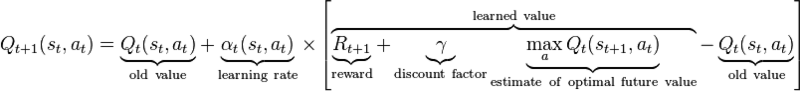

Following this update, we update our total reward G and update state (St) to be the previous state2 (St+1) so the loop can begin again and the next action can be decided.

After so many episodes, the algorithm will converge and determine the optimal action for every state using the Q table, ensuring the highest possible reward. We now consider the environment problem solved.

In [ ]:
# Reset environment
s = env.reset()
d = False
# The Q-Table learning algorithm
while d != True:
    env.render()
    # Choose action from Q table
    a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
    #Get new state & reward from environment
    s1,r,d,_ = env.step(a)
    #Update Q-Table with new knowledge
    Q[s,a] = Q[s,a] + eta*(r + gma*np.max(Q[s1,:]) - Q[s,a])
    s = s1
# Code will stop at d == True, and render one state before it

In [ ]:
import gym
import numpy as np 

# 1. Load Environment and Q-table structure

Q = np.zeros([env.observation_space.n,env.action_space.n])
# env.obeservation.n, env.action_space.n gives number of states and action in env loaded

# 2. Parameters of Q-leanring
eta = .628
gma = .9
epis = 5000
rev_list = [] # rewards per episode calculate

# 3. Q-learning Algorithm

for i in range(epis):
    # Reset environment
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        env.render()
        j+=1
        # Choose action from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state & reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + eta*(r + gma*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    rev_list.append(rAll)
    env.render()

print("Reward Sum on all episodes " + str(sum(rev_list)/epis))
print("Final Values Q-Table")
print(Q)

In [ ]:
# AI 2018

# Importing the libraries
import os
import numpy as np
import gym
from gym import wrappers
# import pybullet_envs

# Setting the Hyper Parameters
class Hp():
    '''
    class to set Hyper Parameters
    '''
    def __init__(self):
        self.nb_steps = 1000
        self.episode_length = 1000
        self.learning_rate = 0.02
        self.nb_directions = 16
        self.nb_best_directions = 16
        assert self.nb_best_directions <= self.nb_directions
        self.noise = 0.03
        self.seed = 1
        self.env_name = 'HalfCheetahBulletEnv-v0'


# Normalizing the states
class Normalizer():
    '''
    class to normalize the state
    '''
    def __init__(self, nb_inputs):
        self.n = np.zeros(nb_inputs)
        self.mean = np.zeros(nb_inputs)
        self.mean_diff = np.zeros(nb_inputs)
        self.var = np.zeros(nb_inputs)
    
    def observe(self, x):
        self.n += 1.
        last_mean = self.mean.copy()
        self.mean += (x - self.mean) / self.n
        self.mean_diff += (x - last_mean) * (x - self.mean)
        self.var = (self.mean_diff / self.n).clip(min = 1e-2)
    
    def normalize(self, inputs):
        obs_mean = self.mean
        obs_std = np.sqrt(self.var)
        return (inputs - obs_mean) / obs_std


# Building the AI
class Policy():
    
    def __init__(self, input_size, output_size):
        self.theta = np.zeros((output_size, input_size))
    
    def evaluate(self, input, delta = None, direction = None):
        if direction is None:
            return self.theta.dot(input)
        elif direction == "positive":
            return (self.theta + hp.noise*delta).dot(input)
        else:
            return (self.theta - hp.noise*delta).dot(input)
    
    def sample_deltas(self):
        return [np.random.randn(*self.theta.shape) for _ in range(hp.nb_directions)]
    
    def update(self, rollouts, sigma_r):
        step = np.zeros(self.theta.shape)
        for r_pos, r_neg, d in rollouts:
            step += (r_pos - r_neg) * d
        self.theta += hp.learning_rate / (hp.nb_best_directions * sigma_r) * step


In [ ]:
# Exploring the policy on one specific direction and over one episode
def explore(env, normalizer, policy, direction = None, delta = None):
    state = env.reset()
    done = False
    num_plays = 0.
    sum_rewards = 0
    while not done and num_plays < hp.episode_length:
        normalizer.observe(state)
        state = normalizer.normalize(state)
        action = policy.evaluate(state, delta, direction)
        state, reward, done, _ = env.step(action)
        reward = max(min(reward, 1), -1)
        sum_rewards += reward
        num_plays += 1
    return sum_rewards

# Training the AI
def train(env, policy, normalizer, hp):
    
    for step in range(hp.nb_steps):
        
        # Initializing the perturbations deltas and the positive/negative rewards
        deltas = policy.sample_deltas()
        positive_rewards = [0] * hp.nb_directions
        negative_rewards = [0] * hp.nb_directions
        
        # Getting the positive rewards in the positive directions
        for k in range(hp.nb_directions):
            positive_rewards[k] = explore(env, normalizer, policy, direction = "positive", delta = deltas[k])
        
        # Getting the negative rewards in the negative/opposite directions
        for k in range(hp.nb_directions):
            negative_rewards[k] = explore(env, normalizer, policy, direction = "negative", delta = deltas[k])
        
        # Gathering all the positive/negative rewards to compute the standard deviation of these rewards
        all_rewards = np.array(positive_rewards + negative_rewards)
        sigma_r = all_rewards.std()
        
        # Sorting the rollouts by the max(r_pos, r_neg) and selecting the best directions
        scores = {k:max(r_pos, r_neg) for k,(r_pos,r_neg) in enumerate(zip(positive_rewards, negative_rewards))}
        order = sorted(scores.keys(), key = lambda x:scores[x], reverse = True)[:hp.nb_best_directions]
        rollouts = [(positive_rewards[k], negative_rewards[k], deltas[k]) for k in order]
        
        # Updating our policy
        policy.update(rollouts, sigma_r)
        
        # Printing the final reward of the policy after the update
        reward_evaluation = explore(env, normalizer, policy)
        print('Step:', step, 'Reward:', reward_evaluation)

# Running the main code
def mkdir(base, name):
    path = os.path.join(base, name)
    if not os.path.exists(path):
        os.makedirs(path)
    return path


In [ ]:
work_dir = mkdir('exp', 'brs')
monitor_dir = mkdir(work_dir, 'monitor')

hp = Hp()
np.random.seed(hp.seed)
env = gym.make(hp.env_name)
env = wrappers.Monitor(env, monitor_dir, force = True)
nb_inputs = env.observation_space.shape[0]
nb_outputs = env.action_space.shape[0]
policy = Policy(nb_inputs, nb_outputs)
normalizer = Normalizer(nb_inputs)
train(env, policy, normalizer, hp)